# VA Project Weather in Australia - Team VA_AI_WIN

This template just loads and uses a few of the discussed libraries. Please follow the instruction in Moodle and feel free to remove/update any cells below.

In [1]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import matplotlib_inline
#plots the figures in place instead of a new window
%matplotlib inline
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import altair as alt

import ipywidgets as widgets


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from ipywidgets import interact, interactive, fixed, interact_manual
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from IPython.display import display, clear_output

# Load Data
## Motivation and description
We chose the rain in Australia dataset from [kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) because we thought that it could be interesting to analyse a dataset with around 145k rows. It is also interesting that data from about 10 years of daily observations from different locations throughout Australia has been collected. The "goal" of this dataset is to find a model which is able to predict whether it will rain the next day or not. Besides several numerical attributes, also several categorical attributes are provided. The attributes of the used dataset are explained below.

__Attributes__:

- Date: The observation's date
- Location: The location of the observation
- MinTemp: The minimum temperature on that day (°C)
- MaxTemp: The maximum temperature on that day (°C)
- Rainfall: The rainfall amount measured in mm
- Evaporation: The evaporation also measured in mm
- Sunshine: The number of sunshine hours
- WindGustDir: The strongest wind gust's direction
- WindGustSpeed: The strongest wind gust's speed in km/h
- WindDir9am: The wind's direction at 9 AM
- WindDir3pm: The wind's direction at 3 PM
- WindSpeed9am: The wind's speed (km/h) at 9 AM
- WindSpeed3pm: The wind's speed (km/h) at 3 PM
- Humidity9am: The humidity percentage at 9 AM
- Humidity3pm: The humidity percentage at 3 PM
- Pressure9am: The atmospheric pressure (hpa) at 9 AM
- Pressure3pm: The atmospheric pressure (hpa) at 3 PM
- Cloud9am: Fraction of obscured sky by clouds (in "oktas") at 9 AM
- Cloud3pm: Same as above but at 3 PM
- Temp9am: Temperature in °C at 9 AM
- Temp3pm: Temperature in °C at 3 PM
- RainToday: True, if it has been raining on that day, otherwise False
- RainTomorrow: True, if it has been raining on the next day, otherwise False

## First glimpse

In [2]:
#use a standard dataset of heterogenous data
weather = pd.read_csv('data/weatherAUS.csv')
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Look at data types

In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Data preparation

In [4]:
# Convert Date to a date type and create new columns
weather['Date_converted'] = pd.to_datetime(weather['Date'], format='%Y-%m-%d')
weather['Year'] = weather['Date_converted'].dt.year
weather['Month'] = weather['Date_converted'].dt.month
weather['Day'] = weather['Date_converted'].dt.day

# Calculate percentage of null values per attribute
missing_in_percentage = weather.isnull().sum() * 100 / len(weather)
missing = pd.DataFrame({'col': weather.columns, 'missing_percent': missing_in_percentage})
missing.sort_values('missing_percent', inplace=True, ascending=False)
missing.head(8).style.hide_index()

col,missing_percent
Sunshine,48.009762
Evaporation,43.166506
Cloud3pm,40.807095
Cloud9am,38.421559
Pressure9am,10.356799
Pressure3pm,10.331363
WindDir9am,7.263853
WindGustDir,7.098859


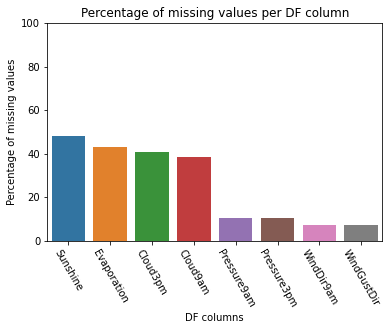

In [5]:
ax = sns.barplot(x="col", y="missing_percent", data=missing.head(8))
ax.set_ylim((0, 100))
ax.set_xticklabels(ax.get_xticklabels(), rotation=300)
ax.set_title('Percentage of missing values per DF column')
ax.set_xlabel('DF columns')
_ = ax.set_ylabel('Percentage of missing values')

It can be seen that for some columns nearly half of the values (40 - 48%) are missing (shown in the table as well as the plot above). Now we further investigate this issue by looking at the columns sunshine, evaporation, cloud3pm and cloud9am by grouping the percentage of missing values first by season, to look whether we can see a seasonal affect. We also group the percentage of missing values by location to see if we can spot a locational affect.

#### Percentage of missing values per season

In [6]:
# Mapping the dates to seasons and calculate for each season and attribute the percentage of missing values.
seasons = {
   1: 'Winter',
   2: 'Spring',
   3: 'Summer',
   4: 'Autumn'
}
df_values_season = weather[['Year', 'Month', 'Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']].copy()

df_values_season['Season'] = (df_values_season['Month'] % 12 + 3) // 3
df_values_season['Season_name'] = df_values_season['Season'].map(seasons)

df_season_count_null = df_values_season[['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']].isnull().groupby(df_values_season['Season_name']).sum()
df_season_count_all = df_values_season[['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']].isnull().groupby(df_values_season['Season_name']).count()

df_missing_values_percent = (df_season_count_null / df_season_count_all) * 100
df_missing_values_percent['Season'] = df_missing_values_percent.index.tolist()
df_missing_values_percent.style.hide_index()

Sunshine,Evaporation,Cloud3pm,Cloud9am,Season
47.395082,42.394657,40.996689,38.537510,Autumn
48.680222,43.780054,41.022894,38.830232,Spring
48.109535,42.861420,38.639519,36.793968,Summer
47.793406,43.593759,42.648482,39.562098,Winter


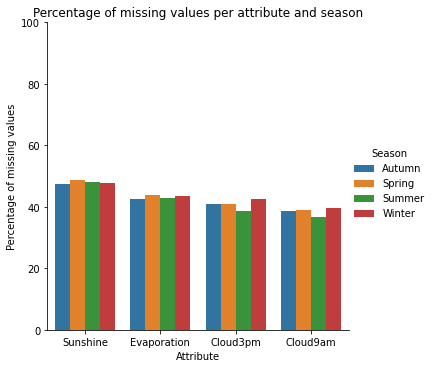

In [7]:
df_melted = df_missing_values_percent.melt(id_vars=['Season'], var_name='Attribute', value_name='Percentage')
ax = sns.catplot(data=df_melted, x='Attribute', y='Percentage', hue="Season", kind="bar")

ax.set_ylabels("Percentage of missing values")
ax.set(ylim=(0,100))
_ = ax.set(title="Percentage of missing values per attribute and season")


__Interpretation__:

It can be seen (table and plot) that there is not really a difference between the seasons. So a seasonal effect may be excluded.

#### Percentage of missing values per location

In [8]:
df_values_location = weather[['Location', 'Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']]
df_values_location_count_null = weather[['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']].isnull().groupby(weather['Location']).sum()
# fillna is needed in order to get the 
df_values_location_count_all = weather[['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']].isnull().groupby(weather['Location']).count()

df_missing_values_percent = (df_values_location_count_null / df_values_location_count_all) * 100
df_missing_values_percent['Location'] = df_missing_values_percent.index.tolist()

##### Sunshine

In [9]:
df_sunshine_missing = df_missing_values_percent[['Location', 'Sunshine']]
df_sunshine_missing = df_sunshine_missing.sort_values('Sunshine', ascending=False)
# Number of locations
len(df_sunshine_missing)

49

In [10]:
df_sunshine_missing.head(30).style.hide_index()

Location,Sunshine
Newcastle,100.000000
Walpole,100.000000
NorahHead,100.000000
Penrith,100.000000
Richmond,100.000000
SalmonGums,100.000000
Launceston,100.000000
Katherine,100.000000
Tuggeranong,100.000000
GoldCoast,100.000000


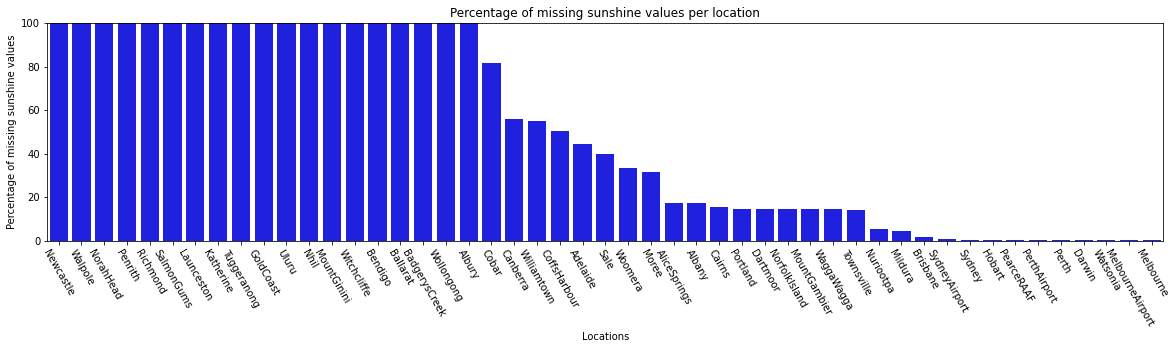

In [11]:
fig=plt.figure(figsize=(20,4))
ax = sns.barplot(x='Location', y='Sunshine', data=df_sunshine_missing, color='b')
ax.set_ylim((0, 100))
ax.set_xticklabels(ax.get_xticklabels(), rotation=300)
ax.set_title('Percentage of missing sunshine values per location')
ax.set_xlabel('Locations')
_ = ax.set_ylabel('Percentage of missing sunshine values')

__Interpretation__:

As it can be seen, for 19 of the 49 locations no values about the sunshine is tracked which explains the large amount of missing data for this attribute. The reason for this is, however, unknown.
##### Evaporation

In [12]:
df_evaporation_missing = df_missing_values_percent[['Location', 'Evaporation']]
df_evaporation_missing = df_evaporation_missing.sort_values('Evaporation', ascending=False)
df_evaporation_missing.head(30).style.hide_index()

Location,Evaporation
Newcastle,100.000000
MountGinini,100.000000
NorahHead,100.000000
PearceRAAF,100.000000
GoldCoast,100.000000
Penrith,100.000000
SalmonGums,100.000000
Tuggeranong,100.000000
Uluru,100.000000
Nhil,100.000000


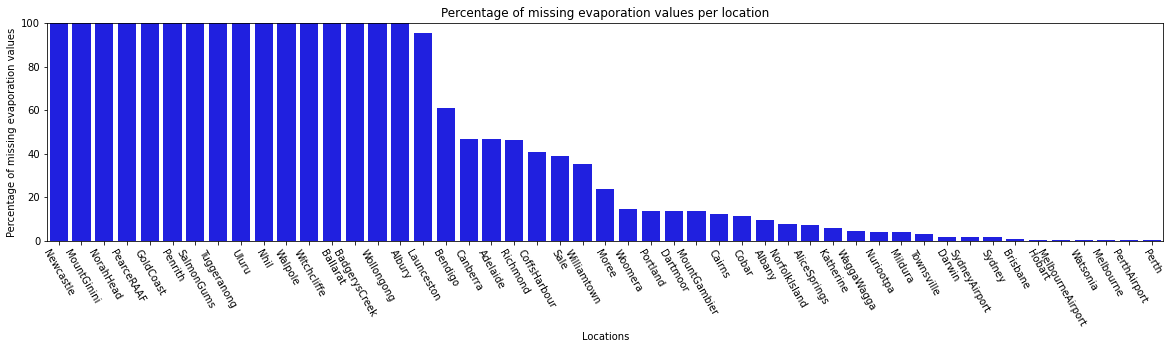

In [13]:
fig=plt.figure(figsize=(20,4))
ax = sns.barplot(x='Location', y='Evaporation', data=df_evaporation_missing, color='b')
ax.set_ylim((0, 100))
ax.set_xticklabels(ax.get_xticklabels(), rotation=300)
ax.set_title('Percentage of missing evaporation values per location')
ax.set_xlabel('Locations')
_ = ax.set_ylabel('Percentage of missing evaporation values')

__Interpretation__:

As already has been shown before the reason for the high amount of null values might be that for 16 locations no evaporations are collected.
##### Cloud 3 PM and Cloud 9 AM

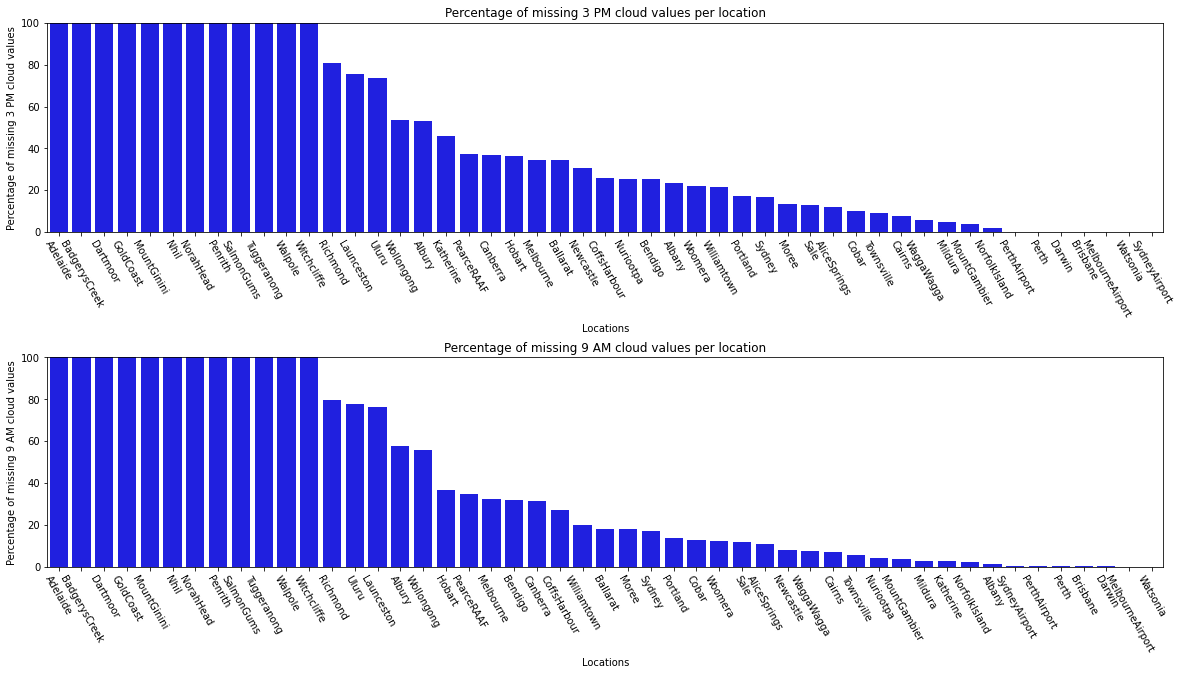

In [14]:
df_cloud3pm_missing = df_missing_values_percent[['Cloud3pm']]
df_cloud3pm_missing = df_cloud3pm_missing.reset_index()
df_cloud3pm_missing = df_cloud3pm_missing.sort_values(['Cloud3pm', 'Location'], ascending=(False, True))

df_cloud9am = df_missing_values_percent[['Cloud9am']]
df_cloud9am = df_cloud9am.reset_index()
df_cloud9am = df_cloud9am.sort_values(by=['Cloud9am', 'Location'], ascending=(False, True))

fig = plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
ax = sns.barplot(x='Location', y='Cloud3pm', data=df_cloud3pm_missing, color='b')
ax.set_ylim((0, 100))
ax.set_xticklabels(ax.get_xticklabels(), rotation=300)
ax.set_title('Percentage of missing 3 PM cloud values per location')
ax.set_xlabel('Locations')
_ = ax.set_ylabel('Percentage of missing 3 PM cloud values')

plt.subplot(2, 1, 2)
ax = sns.barplot(x='Location', y='Cloud9am', data=df_cloud9am, color='b')
ax.set_ylim((0, 100))
ax.set_xticklabels(ax.get_xticklabels(), rotation=300)
ax.set_title('Percentage of missing 9 AM cloud values per location')
ax.set_xlabel('Locations')
_ = ax.set_ylabel('Percentage of missing 9 AM cloud values')

plt.subplots_adjust(hspace = 0.6)

__Interpretation__:

For the clouds at 3 PM and 9 PM value, we can also see that for the exact 12 countries no values are provided. We can therefore assume that at these locations, the fraction of sky obscured by cloud is not measured.

# Statistics

In [15]:
weather.drop(columns=['Year', 'Month', 'Day']).describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Now we look at some maybe interesting attributes and a comparison between them.

## Temperature

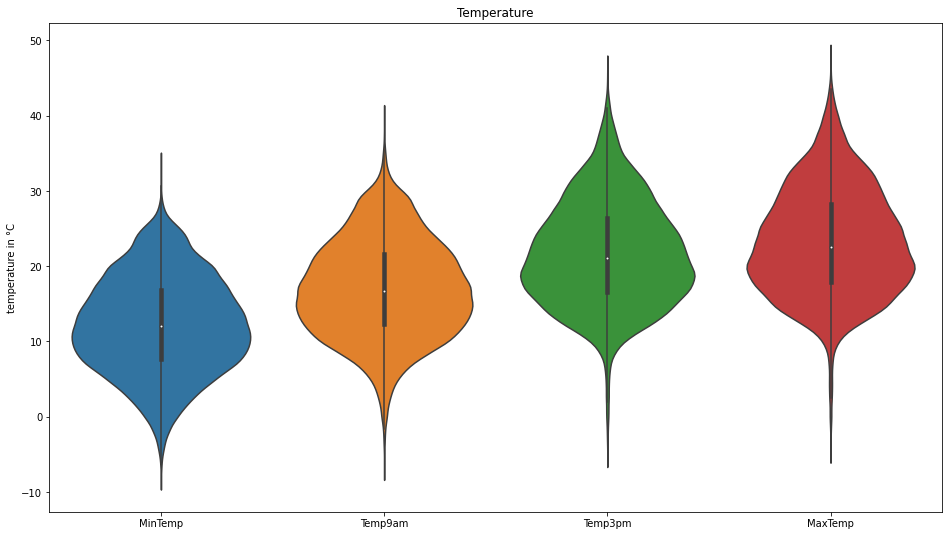

In [16]:
tmp = {'x': ['MinTemp'] * len(weather.MinTemp) + ['Temp9am'] * len(weather.Temp9am) + ['Temp3pm'] * len(weather.Temp3pm) + ['MaxTemp'] * len(weather.MaxTemp), 'y': weather.MinTemp.append([weather.Temp9am, weather.Temp3pm, weather.MaxTemp])}
tmp = pd.DataFrame(tmp)
fig, ax = plt.subplots(figsize=(16,9))
g = sns.violinplot(data=tmp, x='x', y='y')
plt.title('Temperature')
plt.ylabel('temperature in °C') #, rotation='horizontal')
plt.xlabel('')
plt.show()

### Interpretation

All measured temperatures are similar distributed. The absolute values of the 3 PM temperature and the maximum temperature are also very similar. It follows, that the maximum temperature of a day occures around 3 PM.

## Wind Speed

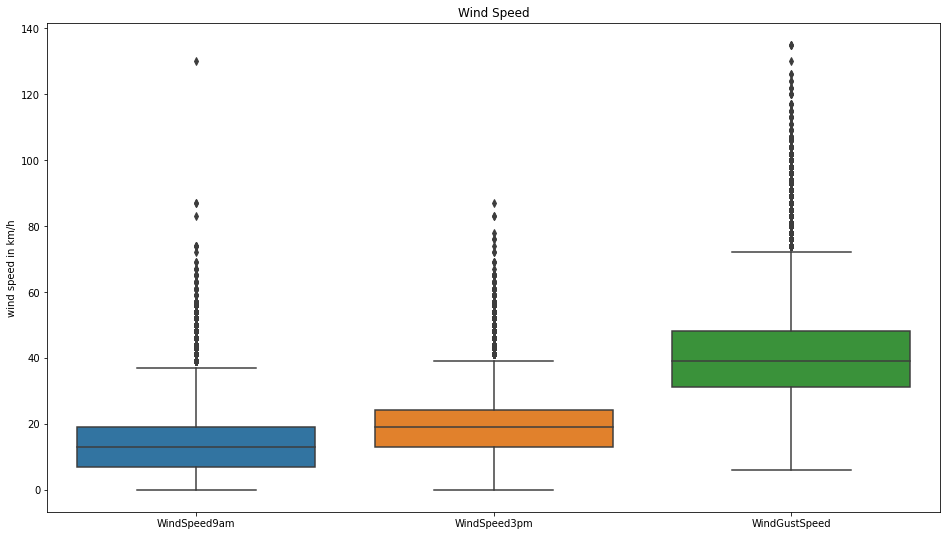

In [17]:
tmp = {'x': ['WindSpeed9am'] * len(weather.WindSpeed9am) + ['WindSpeed3pm'] * len(weather.WindSpeed3pm) + ['WindGustSpeed'] * len(weather.WindGustSpeed), 'y': weather.WindSpeed9am.append([weather.WindSpeed3pm, weather.WindGustSpeed])}
tmp = pd.DataFrame(tmp)
fig, ax = plt.subplots(figsize=(16,9))
g = sns.boxplot(data=tmp, x='x', y='y')
plt.title('Wind Speed')
plt.ylabel('wind speed in km/h') #, rotation='horizontal')
plt.xlabel('')
plt.show()

### Interpretation

General the wind speed on afternoons is higher. This is probably due to the higher temperatures and the resulting higher pressure differences

## Humidity

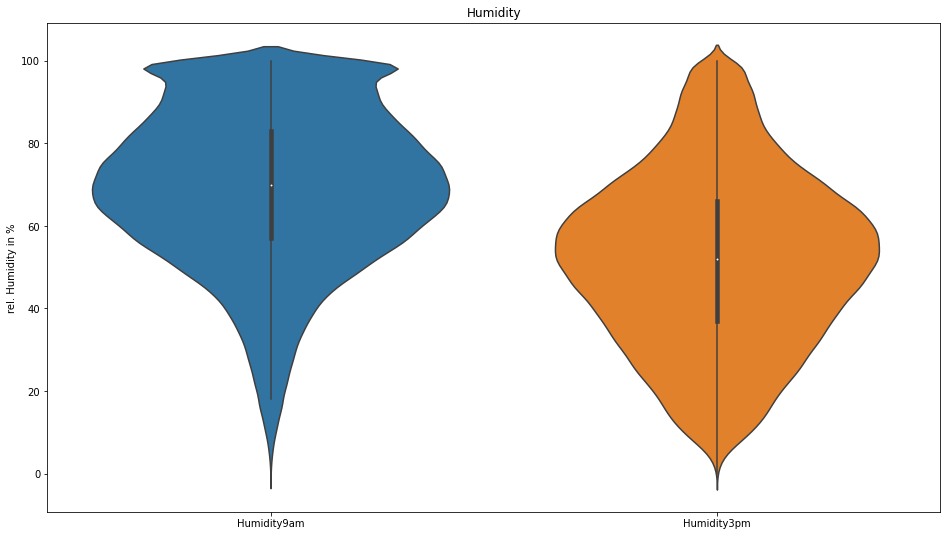

In [18]:
tmp = {'x': ['Humidity9am'] * len(weather.Humidity9am) + ['Humidity3pm'] * len(weather.Humidity3pm), 'y': weather.Humidity9am.append(weather.Humidity3pm)}
tmp = pd.DataFrame(tmp)
fig, ax = plt.subplots(figsize=(16,9))
g = sns.violinplot(data=tmp, x='x', y='y')
plt.title('Humidity')
plt.ylabel('rel. Humidity in %') #, rotation='horizontal')
plt.xlabel('')
plt.show()

### Interpretation

The relative humidity is droping during the day, due to the rising temperature and the resulting higher dew point.

## Rainfall

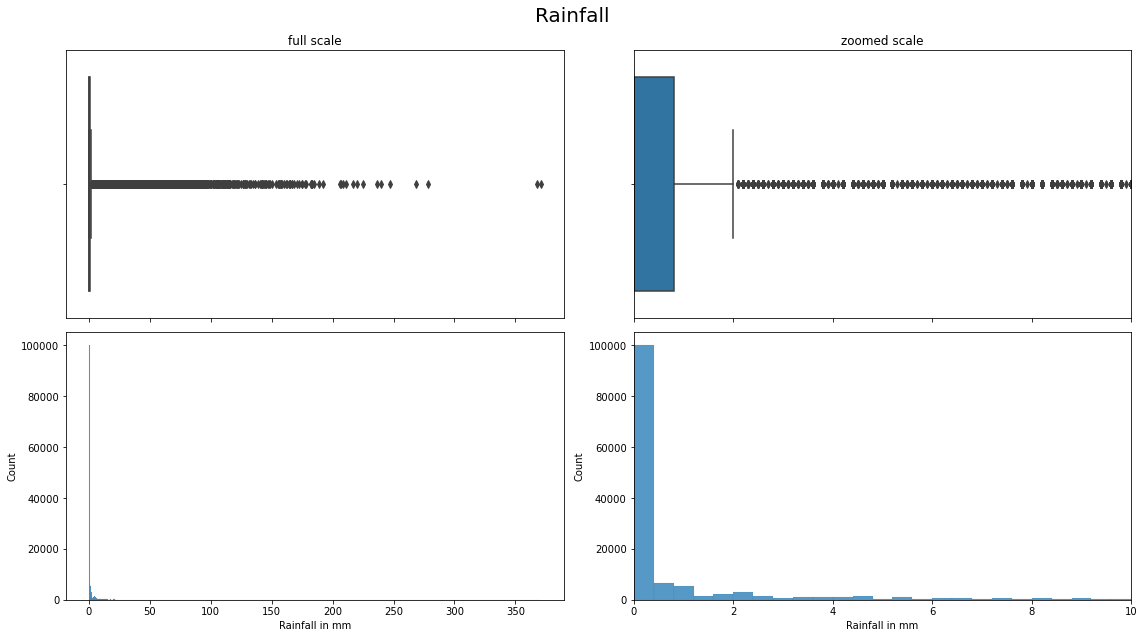

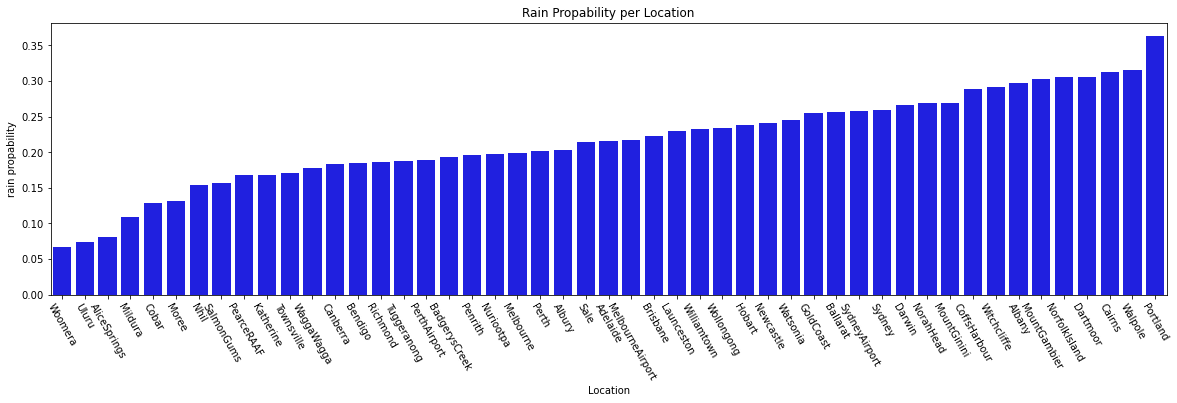

In [19]:
fig, axs = plt.subplots(2,2, figsize=(16, 9), sharex='col')
sns.boxplot(data=weather, x='Rainfall', ax=axs[0,0])
sns.boxplot(data=weather, x='Rainfall', ax=axs[0,1])
#axs[0,1].set_xlim((0, 10))

#sns.kdeplot(data=weather, x='Rainfall', ax=axs[1,0], cut=0, bw_adjust=.100)
#sns.kdeplot(data=weather, x='Rainfall', ax=axs[1,1], cut=0, bw_adjust=.100)
sns.histplot(data=weather, x='Rainfall', kde=False, ax=axs[1,0], binwidth=.4)
sns.histplot(data=weather, x='Rainfall', kde=False, ax=axs[1,1], binwidth=.4)
axs[1,1].set_xlim((0, 10))

axs[0,0].set_title('full scale')
axs[0,1].set_title('zoomed scale')
axs[0,0].set_xlabel('')
axs[0,1].set_xlabel('')
axs[1,0].set_xlabel('Rainfall in mm')
axs[1,1].set_xlabel('Rainfall in mm')
fig.suptitle('Rainfall', fontsize=20)
plt.tight_layout()
plt.show()


tmp = (weather.RainToday[weather.RainToday == 'Yes'].groupby(weather.Location).count() / weather.Location.groupby(weather.Location).count()).sort_values()
tmp = tmp.to_frame('rain propability').reset_index()
plt.figure(figsize=(20,5))
ax = sns.barplot(data=tmp, x='Location', y='rain propability', color='b')
ax.set_xticklabels(ax.get_xticklabels(), rotation=300)
plt.title('Rain Propability per Location')
plt.show()

### Interpretation

Most of the time it is not raining. We can see that the rain has a relatively high range (0 - 371) whereby most of the data is rather small in contrast to the range. An explanation would be, as already mentioned, that it does not really rain often and when it rains, it then does not really rain much which is clear if we look at at the zoomed in plots.

We can also see that the rainfall propability varies for all locations.

# Correlations

In this section, we will look at different correlations of numerical attributes. We will look at the statistics as well as on correlation heatmaps and scatter plot matrices with and without categorical attributes.

In [20]:
# Use data set without N/A values
weather_correlations = weather.drop(columns=['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am'])
weather_correlations.dropna(inplace=True)

weather_correlations_numerical = weather_correlations[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']]

## Scatter plot matrices

First have a look at the correlations. For better readability, we also plotted the correlation coefficents as a heatmap

In [21]:
corr = weather_correlations_numerical.corr()

corr

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.728942,0.103807,0.159176,0.150577,0.146078,-0.218312,0.026733,-0.433645,-0.448298,0.898785,0.704477
MaxTemp,0.728942,1.000000,-0.076825,0.056742,-0.006114,0.013976,-0.517188,-0.497679,-0.312597,-0.411360,0.884925,0.984357
Rainfall,0.103807,-0.076825,1.000000,0.130388,0.085376,0.060288,0.238756,0.259652,-0.167595,-0.126520,0.007418,-0.080376
WindGustSpeed,0.159176,0.056742,0.130388,1.000000,0.589735,0.679223,-0.183729,-0.020903,-0.445046,-0.399751,0.124733,0.018325
WindSpeed9am,0.150577,-0.006114,0.085376,0.589735,1.000000,0.499372,-0.221500,-0.017875,-0.201550,-0.150433,0.089493,-0.019280
WindSpeed3pm,0.146078,0.013976,0.060288,0.679223,0.499372,1.000000,-0.093364,0.053916,-0.284036,-0.244390,0.126778,-0.011471
Humidity9am,-0.218312,-0.517188,0.238756,-0.183729,-0.221500,-0.093364,1.000000,0.684373,0.115345,0.168052,-0.464487,-0.510028
Humidity3pm,0.026733,-0.497679,0.259652,-0.020903,-0.017875,0.053916,0.684373,1.000000,-0.035468,0.046073,-0.202107,-0.547120
Pressure9am,-0.433645,-0.312597,-0.167595,-0.445046,-0.201550,-0.284036,0.115345,-0.035468,1.000000,0.960248,-0.400133,-0.270662
Pressure3pm,-0.448298,-0.411360,-0.126520,-0.399751,-0.150433,-0.244390,0.168052,0.046073,0.960248,1.000000,-0.453075,-0.378574


<AxesSubplot:>

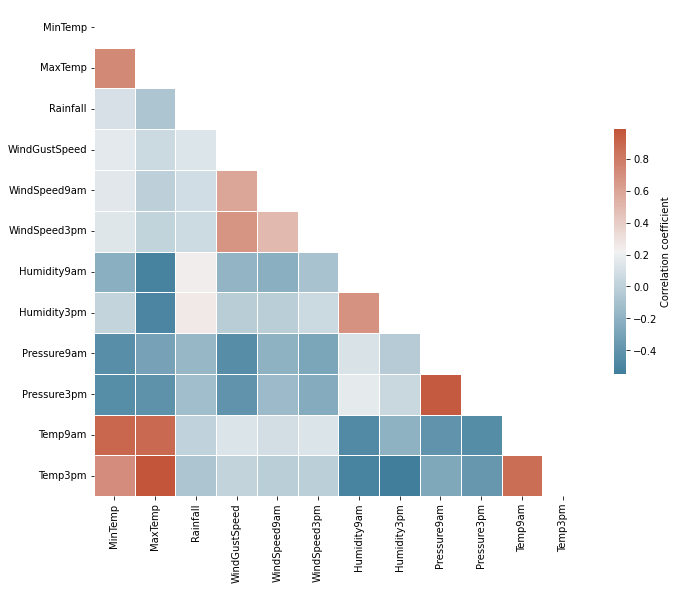

In [22]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap 
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5, 'label': 'Correlation coefficient'})

Now we decided to look at the SPLOM of different combinations of attributes. Based on the correlation coefficients above, we decided to look at some reasonable scatter plot matrices (SPLOMs).
Mainly on different temperature related values since they highly significant correlation.

## Scatter plot matrices without categorical attributes

,MinTemp,MaxTemp,Temp9am,Temp3pm
MinTemp,1.000000,0.728942,0.898785,0.704477
MaxTemp,0.728942,1.000000,0.884925,0.984357
Temp9am,0.898785,0.884925,1.000000,0.859910
Temp3pm,0.704477,0.984357,0.859910,1.000000


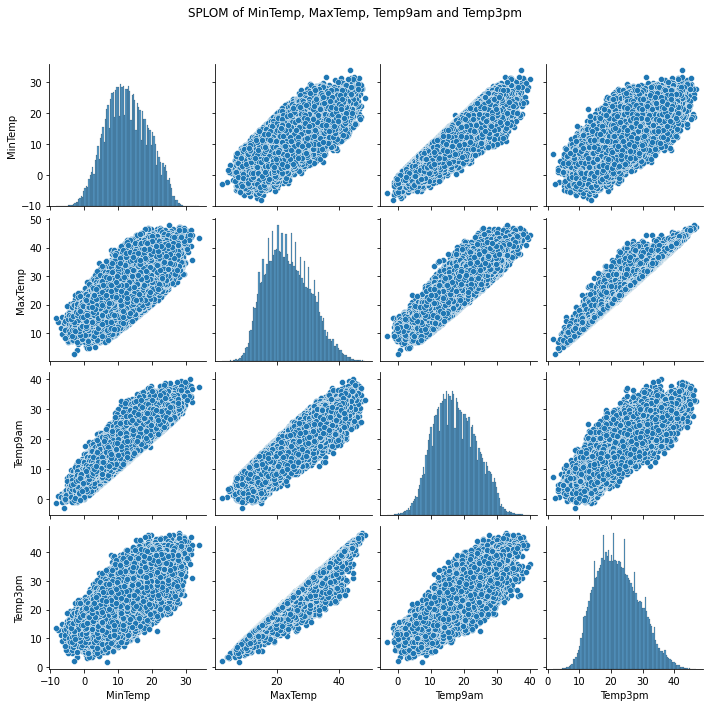

In [23]:
grid = sns.pairplot(weather_correlations_numerical[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']])
grid.fig.subplots_adjust(top=0.9)
_= grid.fig.suptitle('SPLOM of MinTemp, MaxTemp, Temp9am and Temp3pm')

weather_correlations_numerical[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']].corr()

__Interpretation__:

We can here clearly see that for every temperature combination, a positive correlation exists. However, this correlation is not so strong in every combination, e.g. if we look at the correlation between min and max temperature, we can obviously see that this positive correlated relationship is due to the reason that a maximum temperature is always higher than a min temperature. So a higher minimum temperature tends for higher maximum temperatures. The same for e.g. Temp9am and the minimum temperature. If the minimum temperature is low than the temperature at 9 AM is probably also low. This observations makes sense because 9 AM is before midday and therefore the temperature is still relatively low.

We can also so see that for the temperature at 3 PM we are relatively close to the maximum temperature which makes sense because at 3 PM the temperature is normally relatively high compared to the whole day.

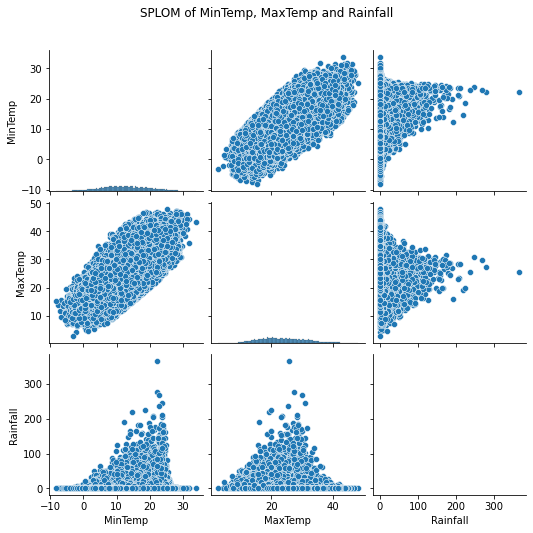

In [24]:
grid = sns.pairplot(weather_correlations_numerical[['MinTemp', 'MaxTemp', 'Rainfall']])
grid.fig.subplots_adjust(top=0.9)
_ = grid.fig.suptitle('SPLOM of MinTemp, MaxTemp and Rainfall')

__Interpretation__:

For the rainfall, we can see that the highest amount is around days where the minimum temperature is around 20 degrees and the maximum temperature is around 20 to 30 degrees. One logical explanation would be that when it is cold, there is no rain and hot days (temperature above ~35 degrees) there is also little rainfall.

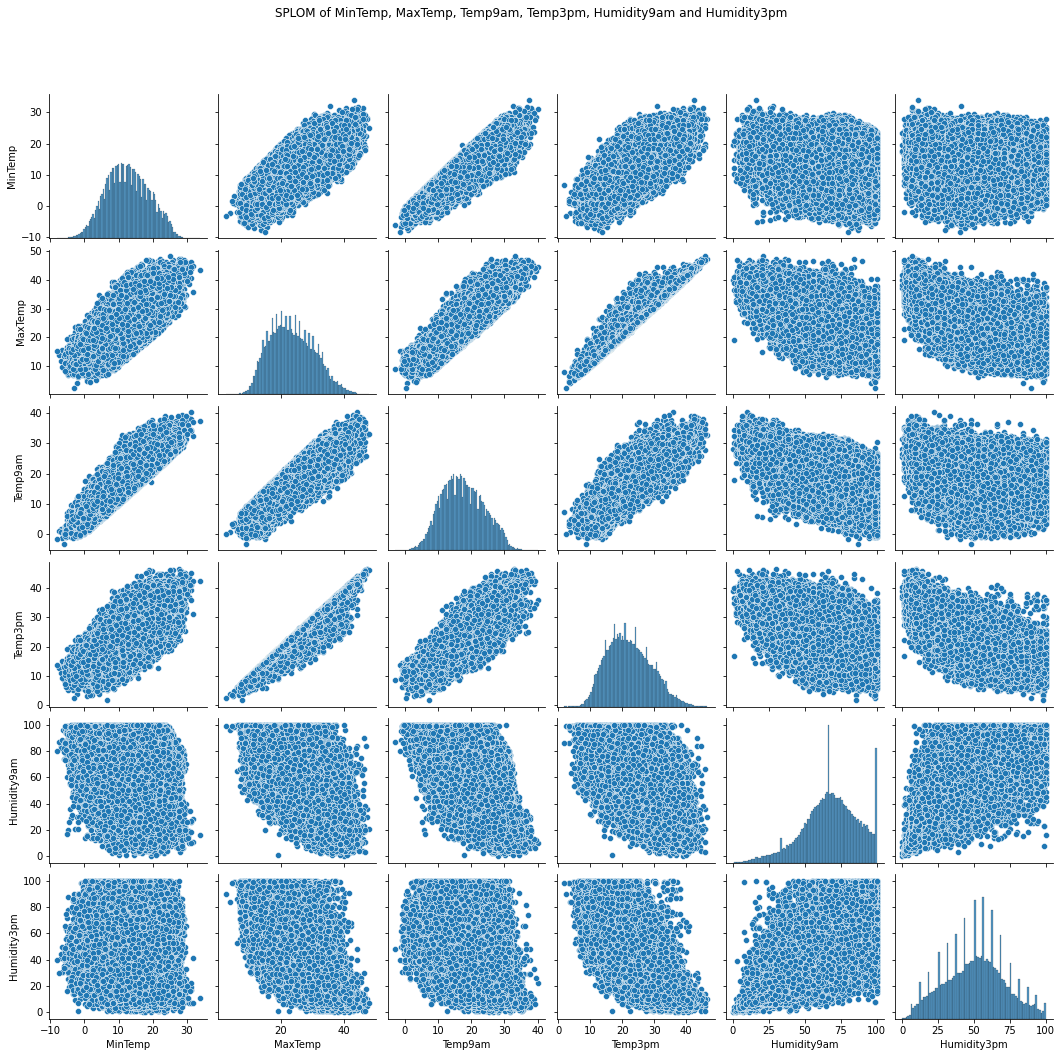

In [25]:
grid = sns.pairplot(weather_correlations_numerical[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'Humidity9am', 'Humidity3pm']])
grid.fig.subplots_adjust(top=0.9)
_ = grid.fig.suptitle('SPLOM of MinTemp, MaxTemp, Temp9am, Temp3pm, Humidity9am and Humidity3pm')

__Interpretation__:

For both humidity measures we might see a small negative correlation with different temperature measurements but in general it is rather a point cloud.

If we look at the correlation between both humidity attributes we can see that they are slightly positive correlated but again, this is also rather a point cloud but the correlation coefficient is here at around 0.68.

,WindGustSpeed,WindSpeed9am,WindSpeed3pm
WindGustSpeed,1.000000,0.589735,0.679223
WindSpeed9am,0.589735,1.000000,0.499372
WindSpeed3pm,0.679223,0.499372,1.000000


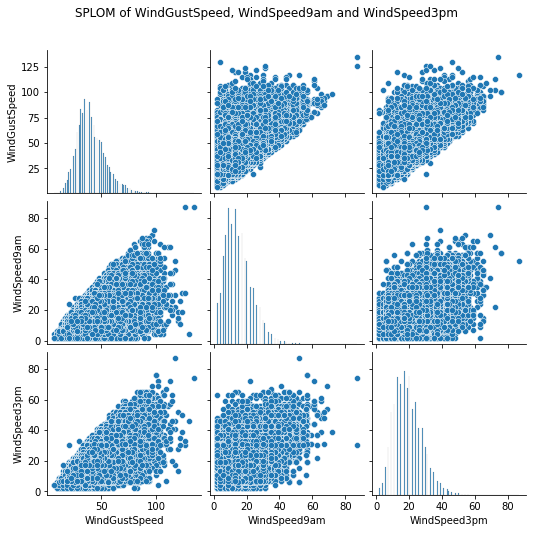

In [26]:
grid = sns.pairplot(weather_correlations_numerical[['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']])
grid.fig.subplots_adjust(top=0.9)
_ = grid.fig.suptitle('SPLOM of WindGustSpeed, WindSpeed9am and WindSpeed3pm')

weather_correlations_numerical[['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']].corr()

__Interpretation__:

We can see that there is a overall a positive correlation, although not very strong. We think that this is due to the fact that on generally windy days with higher max wind gust speed leads generally to higher wind speed at 3 PM and at 9 PM. But again, the data is rather a point cloud.

## Scatter plot matrices with categorical attributes

Here we look at the first scatter plot matrix and color the data points according to different categorical attributes and look wether or not we can see a pattern.

We decided to only use the first SPLOM because it has the most correlated attributes with the highest correlation coefficient.

For the categorical attributes we first use RainToday and then RainTomorrow because from our point of view, these two categorical attributes make much more sense than the
other ones.

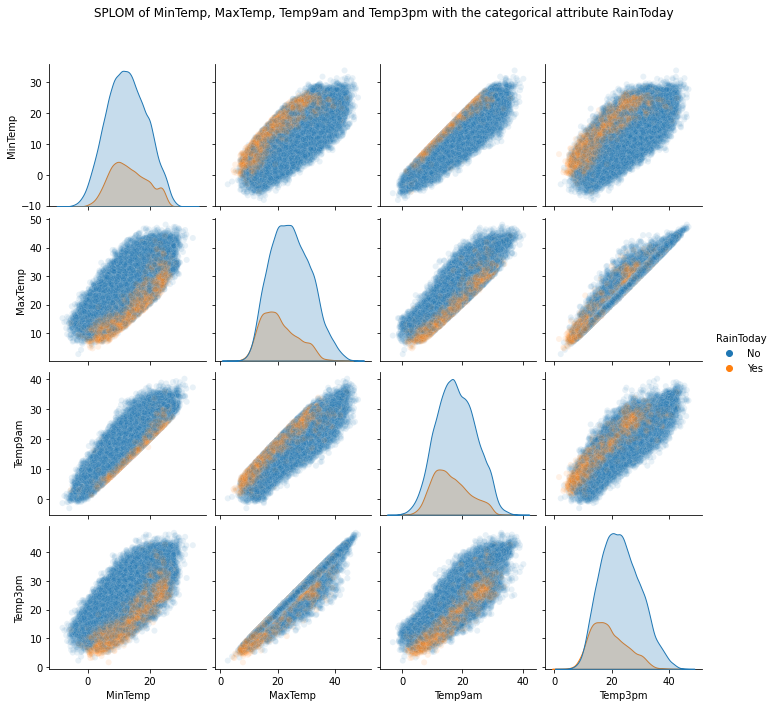

In [27]:
grid = sns.pairplot(weather_correlations[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'RainToday']], hue='RainToday', plot_kws={'alpha': 0.1})
grid.fig.subplots_adjust(top=0.9)
_= grid.fig.suptitle('SPLOM of MinTemp, MaxTemp, Temp9am and Temp3pm with the categorical attribute RainToday')

__Interpretation__:

Here we can see that the max temperature on rainy days is rather low when we look at the corresponding minimum temperature. We can also see that the range of max temperature for every minimum temperature is much larger on dry days than on rainy ones. This may be due to the fact that on exteme hot days there is little rain. It can also be seen that or rainy days this correlation looks very linear in contrast to dry days.

We can also see that the minimum temperature correlates stronger with the temperature at 3 PM if we only look on rainy days. We can also see that, like with the maximum temperature, the relatively lower end of the temperature at 3 PM for every minimum temperature is marked as rainy.

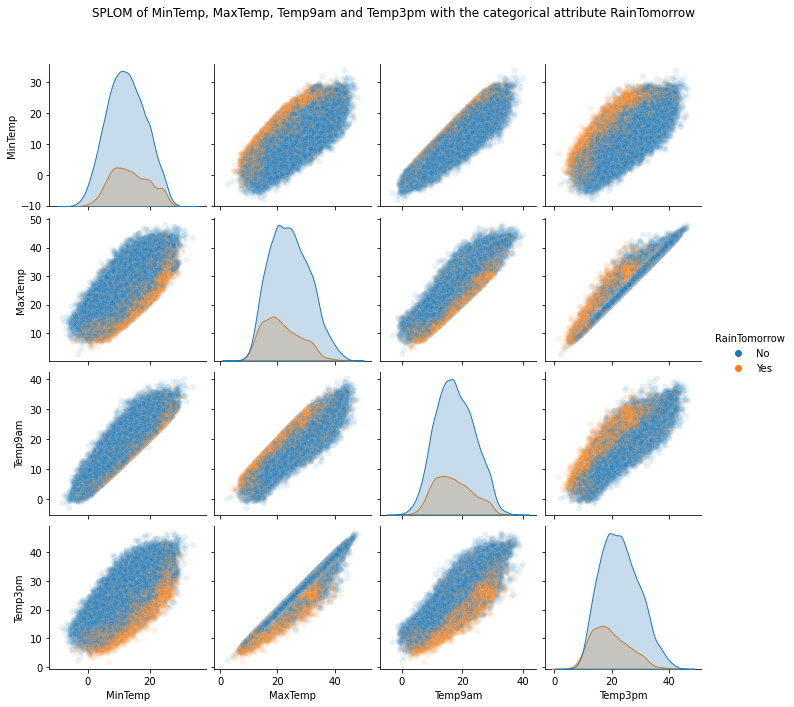

In [28]:
grid = sns.pairplot(weather_correlations[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'RainTomorrow']], hue='RainTomorrow', plot_kws={'alpha': 0.1})
grid.fig.subplots_adjust(top=0.9)
_= grid.fig.suptitle('SPLOM of MinTemp, MaxTemp, Temp9am and Temp3pm with the categorical attribute RainTomorrow')

__Interpretation__:

Here it also looks almost the same as above, but for the max temperature with the temperature at 3 PM plot, we can see that the rainy days are more scattered than above.

At the temperature at 9 AM and 3 PM scatter plot, we can see that rainy tomorrow days are more aligned at the lower end of the correlation.

## Weather throughout the years

In this section, we take a look at the development of various weather-related factors over time. Because the data for years before 2009 and after 2016 is incomplete, only 2009 until the end of 2016 will be considered.
And all locations with insufficient data will be removed.

In [29]:
relyears = weather[weather['Year'] > 2008]
relyears = relyears[relyears['Year'] < 2017]

tmp = pd.DataFrame(relyears.MaxTemp.groupby(relyears.Location).count())
print(f'removing following locations: {tmp[tmp.MaxTemp < 2500].index.values.tolist()}')
relyears = relyears[~relyears.Location.isin(tmp[tmp.MaxTemp < 2500].index.values.tolist())]

removing following locations: ['Katherine', 'Melbourne', 'Nhil', 'Uluru']


First, we inspect the temperature development over the whole country:

In [30]:
maxtemps = relyears.groupby('Year')['MaxTemp'].mean()
mintemps = relyears.groupby('Year')['MinTemp'].mean()

We inspect the raw data:

In [31]:
print(maxtemps)
print(mintemps)

Year
2009    23.289069
2010    22.607196
2011    22.579003
2012    22.355334
2013    23.034707
2014    23.456891
2015    23.127256
2016    23.121930
Name: MaxTemp, dtype: float64
Year
2009    12.164488
2010    12.094283
2011    12.022084
2012    11.215285
2013    11.779340
2014    12.277136
2015    12.086022
2016    12.427087
Name: MinTemp, dtype: float64


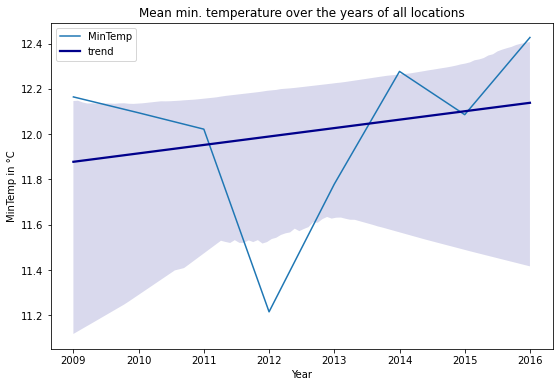

In [32]:
plt.figure(figsize=(9,6))
sns.lineplot(mintemps.index, mintemps, color='#1f77b4', label='MinTemp').set(title="Mean min. temperature over the years of all locations")
sns.regplot(mintemps.index, mintemps, scatter=False, color='darkblue', label='trend')
plt.ylabel('MinTemp in °C')
plt.legend()
plt.show()

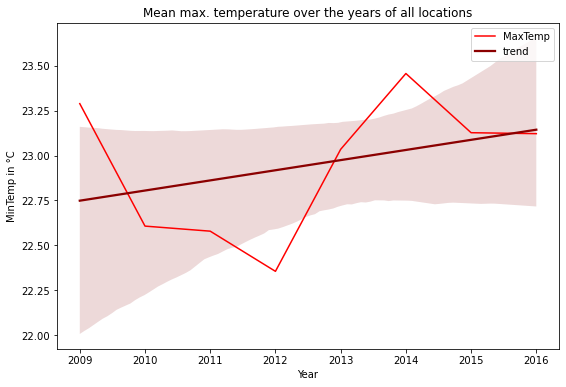

In [33]:
plt.figure(figsize=(9,6))
sns.lineplot(maxtemps.index, maxtemps, color='red', label='MaxTemp').set(title="Mean max. temperature over the years of all locations")
sns.regplot(maxtemps.index, maxtemps, scatter=False, color='darkred', label='trend')
plt.ylabel('MinTemp in °C')
plt.legend()
plt.show()

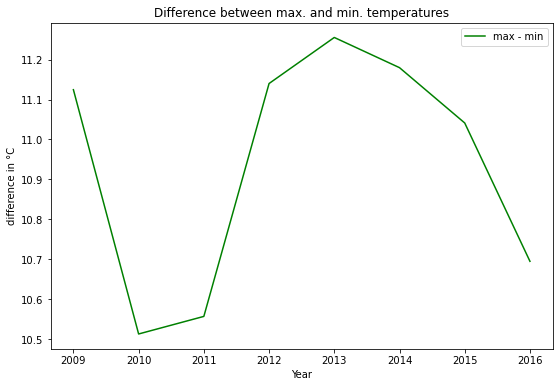

In [34]:
plt.figure(figsize=(9,6))
sns.lineplot(maxtemps.index, maxtemps - mintemps, color='g', label='max - min').set(title="Difference between max. and min. temperatures")
plt.ylabel('difference in °C')
plt.legend()
plt.show()

__Interpretation__:

There are multiple things we can see here. First off, it appears that the year 2012 has been exceptionally cold. Furthermore, a weak correlation of mininum and maximum temperatures can be seen up until the year 2014. From 2013 onwards, the difference of mininum and maximum seems to become smaller, as minimum temperatures continue rising, but maximum temperatures do not. This could indicate that nights are getting warmer.

Next, we take a look at rainfall.

In [35]:
rain = relyears.groupby('Year')['Rainfall'].mean()
print(rain)

Year
2009    2.186469
2010    2.724183
2011    2.833791
2012    2.420138
2013    2.323400
2014    1.998774
2015    2.214965
2016    2.442747
Name: Rainfall, dtype: float64


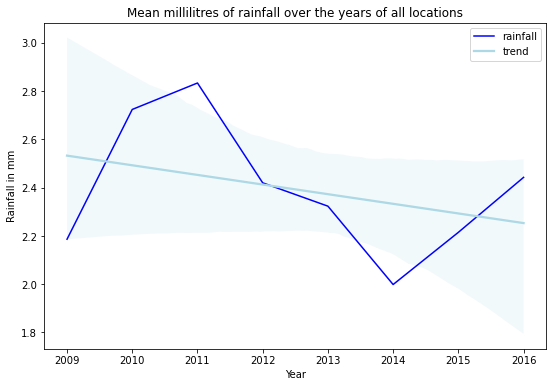

In [36]:
plt.figure(figsize=(9,6))
sns.lineplot(rain.index, rain, color='blue', label='rainfall')
sns.regplot(rain.index, rain, scatter=False, color='lightblue', label='trend')
plt.title("Mean millilitres of rainfall over the years of all locations")
plt.ylabel('Rainfall in mm')
plt.legend()
plt.show()

__Interpretation__:

If we take a look at the temperature graphs and compare them to this graph, we can see that for years which are in average "colder", an increase in mean rainfall has been recorded. Likewise, "hotter" years have been less rainy.  
The trend points toward fewer rainfall in average.

# Interactive part
## Dimension reduction

In [37]:
# variables

pca_weather = None
detail = None
weatherDR=weather

## PCA
First we looked at different ways of reducing dimensions. Then we decided on using PCA, because it delivers good results regardless of the number of features.

We decided to use only numeric features, because the common reduction algorithms are mostly optimized for numeric or categorical approaches not both. 
Other algorithms such as FAMD require their own libraries, which caused problems for us during installation.  Since we do not know the setups the tutors use, they could run into similar problems. Accordingly we decided against such an approach. 

In [38]:
def do_PCA(column):
    if len(column) < 3:
        print("At least three collumns must be chossen")
        return
    global pca_weather 
    pca_weather = None
    l=list(column)
    l.append('Location')
    weatherDR_PCA = weatherDR[l]

    weatherDR_PCA=weatherDR_PCA.dropna()

    pca_weather=StandardScaler().fit_transform(weatherDR_PCA[list(column)])
    pca = PCA(n_components=2)
    pca_weather = pca.fit_transform(pca_weather)
    weatherDR_PCA["X"]=pca_weather[:,0]
    weatherDR_PCA["Y"]=pca_weather[:,1]
    pca_weather =  weatherDR_PCA
    
    if detail is not None:
        detail.widget.children[1].options = column
        detail.widget.children[4].options = column
        detail.widget.children[1].value = column[0]
        detail.widget.children[4].value = column[1]


    print("Dataset is ready")
    print("Rows in the Dataset: " +str(pca_weather.shape[0]))

interact_manual(do_PCA,column=widgets.SelectMultiple(options=["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm"]))

interactive(children=(SelectMultiple(description='column', options=('MinTemp', 'MaxTemp', 'Rainfall', 'Evapora…

<function __main__.do_PCA(column)>

## Clustering
For clustering, we wanted two algorithms we are familiar with, so a better interpretation of the results could be ensured. 
We also set a focus on offering a similar GUI for both algorithms to a potential user.
We got to the K-Means relatively quickly and we found a suitable algorithm in agglomerative clustering. Unfortunately, it turned out that the agglomerative cluster in sk-learning is not deterministic, since no Seed can be used.

However, this was not much of a problem, and we even took it for a chance. We had high hopes, the variance could lead to new findings. But it turned out, that the variance was too small to make a discernible difference.
For the number of clusters, we went with our experience. Based on those, we chose parameters, which made sense and still had enough information content.

In [39]:
def k_means(clusters):
    return KMeans(n_clusters=clusters, random_state=42)

def agg_clust(clusters):
       return AgglomerativeClustering(n_clusters=clusters)

def prep_interaction(algorithmn, clusters):
    global pca_weather

    if pca_weather is None:
        print("Dataset not ready")
        return;

    X=pca_weather[["X", "Y"]].to_numpy()
    if(algorithmn=="K-Means"):
        model=k_means(clusters)
    elif(algorithmn=="Agg. CLustering"):
        model=agg_clust(clusters)
    yhat = model.fit_predict(X)
    pca_weather["Cluster"]=yhat
    cl = unique(yhat)
    fig, ax = plt.subplots()
    for cluster in cl:
        row_ix = where(yhat == cluster)
        ax.scatter(X[row_ix, 0], X[row_ix, 1], alpha=0.9, label=str(cluster+1), s=0.6)
    global detail
    if detail is not None:
        detail.widget.children[0].max = clusters
    ax.legend()
    plt.xlabel("x")
    plt.ylabel("y") 
    
interact_manual(prep_interaction, algorithmn=["K-Means", "Agg. CLustering"],  clusters=(2,12))

interactive(children=(Dropdown(description='algorithmn', options=('K-Means', 'Agg. CLustering'), value='K-Mean…

<function __main__.prep_interaction(algorithmn, clusters)>

## Overlook 
The overview is simply intended to give a quick overview of the values of the individual columns in the individual clusters.
This section also provides distribution charts for every attribute and therefore, provide an overview of the distributions over the individual clusters.

Information which can be used in the Detail View Examination.

In [40]:
def overview_cluster():
    cl=np.unique(pca_weather[['Cluster']].values)
    for cluster in cl:
        d=pca_weather[pca_weather['Cluster']==cluster]
        d=d.drop(["X","Y", "Cluster"], axis=1)
        print("Cluster "+str(cluster+1)+":")
        display(d.describe().drop("count", axis=0))
    
    for col in ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm"]:
        if col in pca_weather.columns:
            _, ax = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})
            
            bx_plot = sns.boxplot(data=pca_weather, y=col, x='Cluster', ax=ax[0], palette='tab10')
            sns.kdeplot(data=pca_weather, x=col, hue='Cluster', ax=ax[1], palette='tab10')
            sns.violinplot(data=pca_weather, y=col, x='Cluster', ax=ax[2], palette='tab10')
            
            ax[0].set_title(f"Boxplot of attribute '{col}'")
            ax[1].set_title(f"Density plot of attribute '{col}'")
            ax[2].set_title(f"Violin plot of attribute '{col}'")


overlook=interact_manual(overview_cluster)
display(overlook)

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

<function __main__.overview_cluster()>

## Detail
Two things were important for the detailed view. First, we wanted a detailed view of each cluster. Second, we wanted to have a comparison between two columns. The reason we chose this approach was, that we believe a comparison of two columns still offers a clear result.

The controls work like this:
- In the cluster you select the cluster that you want to look at specifically.
- With Column you select the Column that you specifically want to emphasize.
- Range attribute: You can have the range you want specifically highlighted. [0.00, corresponds to the min value and 100 to the max value]
- Finally, you can still determine how the two ranges are merged


In [41]:
dimRed=["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm"]
slider1 = widgets.FloatRangeSlider(
    value=[0.0, 100.0],
    min=0.0,
    max=100.0,
    step=0.1,
    description='Range Attribut 1:',
    style = {'description_width': 'initial'})
slider2 = widgets.FloatRangeSlider(
    value=[0.0, 100.0],
    min=0.0,
    max=100.0,
    step=0.1,
    description='Range Attribut 2:',
    style = {'description_width': 'initial'})

def lookInto(cluster, collumn1,  range1, operation, collumn2,  range2):
    global pca_weather
    if  pca_weather is None:
        print("CLustering not finished")
        return
    if "Cluster" not in pca_weather.columns:
        print("CLustering not finished")
        return
    if(collumn1 != collumn2):
        d=pca_weather[[collumn1, collumn2, "X", "Y", "Cluster", "Location"]]
    else:
        d=pca_weather[[collumn1, "X", "Y", "Cluster", "Location"]]

    d=d[d["Cluster"]==(cluster-1)]
    c1=None
    c2=None
    if range1 != (0.00, 100):
        c1=d[[collumn1]]
        max=c1.max()[0]
        min=c1.min()[0]
        
        prc=(c1.max()[0]-c1.min()[0]) /100
        c1=np.logical_and(c1[collumn1] >= min+prc*range1[0], c1[collumn1] <= min+prc*range1[1])
        
    if range2 != (0.00, 100):
        c2=d[[collumn2]]
        max=c2.max()[0]
        min=c2.min()[0]
        
        prc=(c2.max()[0]-c2.min()[0]) /100
        c2=np.logical_and(c2[collumn2] >= min+prc*range2[0], c2[collumn2] <= min+prc*range1[1])
            

    if c1 is None and c2 is None:
        fig, ax = plt.subplots(2, figsize=(20, 20))
        ax[0].set_title("Cluster "+str(cluster)+": X vs Y")
        ax[0].scatter(d["X"], d["Y"], alpha=0.4, label=str(cluster), s=4.0)
        plt.xlabel("x")
        plt.ylabel("y")
        
        ax[1].set_title("Cluster "+str(cluster)+": "+collumn1+" vs "+collumn2)
        ax[1].scatter(d[collumn1], d[collumn2], alpha=0.4,  label="Cluster "+str(cluster), s=4.0)
        ax[1].legend()
        plt.xlabel("x")
        plt.ylabel("y")
        
        ax[0].legend()
        ax[1].legend()


        return 
        
    else:
        if(collumn1==collumn2):
            fig, ax = plt.subplots(3, figsize=(25, 20), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})
        
        else:
            fig, ax = plt.subplots(4, figsize=(25, 20), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})

        if c1 is not None and c2 is not None:
            if operation=="AND":
                c=np.logical_and(c1,c2)
            elif operation=="OR":
                c=np.logical_or(c1,c2)
            elif operation=="XOR":
                c=np.logical_xor(c1,c2)
        if c1 is None:
            c=c2
        if c2 is None:
            c=c1

        hit  = d[c]
        miss = d[np.logical_not(c)]
        
        d['Category'] = ["Hit" if val else 'Miss' for val in c]

        ax[0].set_title('Cluster '+str(cluster)+': Hit / Miss on X vs Y')

        ax[0].scatter(hit["X"], hit["Y"], alpha=0.4,  label="HIT ("+str((hit.shape[0])//((miss.shape[0]+hit.shape[0])//100))+"%)", s=4.0)
        ax[0].scatter(miss["X"], miss["Y"], alpha=0.4, label="MISS("+str((miss.shape[0])//((miss.shape[0]+hit.shape[0])//100))+"%)", s=4.0)
        ax[0].legend()
        plt.setp(ax[0], ylabel= 'Y')
        plt.setp(ax[0], xlabel= 'X')

        ax[1].set_title('Cluster '+str(cluster)+': Hit / Miss on '+collumn1+' vs '+collumn2)
        ax[1].scatter(hit[collumn1], hit[collumn2], alpha=0.6,  label="HIT ("+str((hit.shape[0])//((miss.shape[0]+hit.shape[0])//100))+"%)", s=4.0)
        ax[1].scatter(miss[collumn1], miss[collumn2], alpha=0.6, label="MISS("+str((miss.shape[0])//((miss.shape[0]+hit.shape[0])//100))+"%)", s=4.0)
        ax[1].legend()
        plt.setp(ax[1], ylabel= collumn1)
        plt.setp(ax[1], xlabel= collumn2)

        
        x1 = list(hit[collumn1])
        x2 = list(miss[collumn1])

        names = ['Hit', 'Miss']
        
        sns.kdeplot(data=d, x=collumn1, hue="Category", ax=ax[2])
        ax[2].set_title(f"Cluster {cluster}: Density plot of '{collumn1}'")

        x1 = list(hit[collumn2])
        x2 = list(miss[collumn2])
        if(collumn1!=collumn2):
            sns.kdeplot(data=d, x=collumn2, hue="Category", ax=ax[3])
            ax[3].set_title(f"Cluster {cluster}:Density plot of '{collumn2}'");
            
            _ = plt.figure()
            _ = sns.jointplot(data=d, x=collumn1, y=collumn2, hue="Category", alpha=0.1)
 

detail = interact_manual(lookInto,  cluster=(1,12), collumn1=dimRed,  operation=["AND", "OR", "XOR"], range1=slider1, collumn2=dimRed,  range2=slider2)
display(detail)

interactive(children=(IntSlider(value=6, description='cluster', max=12, min=1), Dropdown(description='collumn1…

<function __main__.lookInto(cluster, collumn1, range1, operation, collumn2, range2)>

__Interpretation__:

For this interpretation we used the k-means algorithm with three clusters, since more clusters lead to harder interpretable results. Furthermore, we used all available columns for the dimension reduction procedure.

We can see that the first cluster (cluster 0) rather contains "colder" temperatures (min, max, temperature at 9 AM and 3 PM) whereas the second cluster contains "higher" temperatures. Finally, the third cluster mostly contains temperatures which are in the middle. Furthermore, the first cluster rather contains higher pressure variables than the other ones.

# Summary

This section briefly describes who we reached the requirements of this exercise. The first five points from the task description are obviously fulfilled, so we won't go into detail there.

- First we checked about the high occurrence of null values for certain attributes where we found out that this values were not recorded at every location and therefore there were the high amount of null values.
- We then found that the distribution of the rainfall amount is skewed, i.e. that on most days there is no rain or little rain, but the range is relatively high but with few high values.
- We found out that the distribution of the max temperature and the temperature at 3 PM are very similar and therefore, the maximum temperature of a day occurs around 3 PM.
- We also found out that the humidity is dropping during the day, due to rising temperature and the resulting higher dew point.
- Wind speeds are generally higher in afternoons which might be due to higher temperatures and the resulting higher pressure differences.
- We also found out that the min temperature positively correlates with the maximum temperature which might be because higher minimum temperatures lead to higher maximum temperatures. The same for the temperature at 9 AM and 3 PM.
- We added the categorical attribute 'RainToday' and found out that the temperatures on rainy days are rather lower than on hot days, so for the minimum temperatures the corresponding max temperatures are rather low compared to the values on not raining days.
- We also visualized the minimum and maximum temperatures as well as the rainfall throughout the years. Here we found out that the required data before 2009 and after 2016 is incomplete, so we only visualized this time frame.
    - Here we found out that 2012 was exceptionally cold.
    - From 2013 onwards, the difference between the average minimum and average maximum temperature is getting smaller which might lead to warmer nights since the average minimum temperature is rising.
    - We found out that there is less rainfall on "hotter" years and more on "colder" year. The chart's trend also shows that the average rainfall per year is sinking.
- For the interactive part we implemented the dimensionality reduction using PCA because it is fast and delivers good results regardless of the number of selected features but we only used numerical attributes since common reduction algorithms are optimized for such scenarios.
- For the clustering part we implemented k-means and agglomerative clustering. Then the clusters can be investigated by looking at the attributes' distribution plots or using the second interactive part where different attributes and their correlation can be further investigated.
- As mentioned before, we used the k-means with three clusters, since the interpretation for more clusters would be harder and not so obvious.
    - We can see that the first cluster (cluster 0) rather contains "colder" temperatures (min, max, temperature at 9 AM and 3 PM) whereas the second cluster contains "higher" temperatures. Finally, the third cluster mostly contains temperatures which are in the middle. Furthermore, the first cluster rather contains higher pressure variables thant the other ones.